In [27]:
import data_loader as dl
import matplotlib.pyplot as plt
import numpy as np

In [7]:
sessions = dl.get_data()
sessions.to_csv("merged_dataset", sep=' ')

In [5]:
sessions.head()

,session_id,event_type,offered_discount,name,city,product_name,category_path,price,delivery_timestamp,delivery_company,duration,purchase
0,100001,VIEW_PRODUCT,20,Marcelina Wyłupek,Police,NaN,NaN,NaN,NaN,NaN,0.0,True
1,100001,VIEW_PRODUCT,20,Marcelina Wyłupek,Police,LCD BenQ GL2250,Komputery;Monitory;Monitory LCD,349.0,NaN,NaN,88.0,True
2,100001,VIEW_PRODUCT,20,Marcelina Wyłupek,Police,LCD Asus VK248H,Komputery;Monitory;Monitory LCD,799.0,NaN,NaN,180.0,True
3,100001,VIEW_PRODUCT,20,Marcelina Wyłupek,Police,LCD Dell U2412M,Komputery;Monitory;Monitory LCD,399.0,NaN,NaN,185.0,True
4,100001,VIEW_PRODUCT,20,Marcelina Wyłupek,Police,LCD Asus VS197D,Komputery;Monitory;Monitory LCD,269.0,NaN,NaN,471.0,True


# Ile sesji zakończyło się kupnem?

In [30]:
purchases = 0
without_pur = 0
current_id = 0
for i in range(sessions.shape[0]):
    if(sessions.iloc[i]['session_id'] != current_id):
        current_id = sessions.iloc[i]['session_id']
        if(sessions.iloc[i]['purchase']):
            purchases += 1
        else:
            without_pur += 1

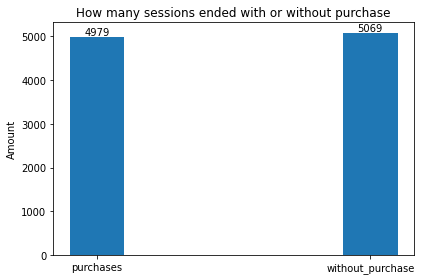

In [39]:
labels = ['purchases', 'without_purchase']
values = [purchases, without_pur]

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects = ax.bar(x, values, width)

ax.set_ylabel('Amount')
ax.set_title('How many sessions ended with or without purchase')
ax.set_xticks(x)
ax.set_xticklabels(labels)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0),  
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects)

fig.tight_layout()

plt.show()

# Czy oferowana zniżka wpływała na dokonanie zakupu?

In [43]:
purchases_discount = 0
purchases_without_d = 0
without_pur_discount = 0
without_pur_without_d = 0
current_id = 0
for i in range(sessions.shape[0]):
    if(sessions.iloc[i]['session_id'] != current_id):
        current_id = sessions.iloc[i]['session_id']
        if(sessions.iloc[i]['purchase']):
            if(sessions.iloc[i]['offered_discount']):
                purchases_discount += 1
            else:
                purchases_without_d += 1
        else:
            if(sessions.iloc[i]['offered_discount']):
                without_pur_discount += 1
            else:
                without_pur_without_d += 1
                

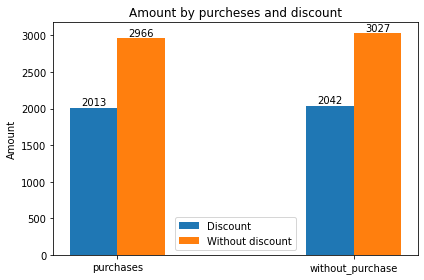

In [46]:
labels = ['purchases', 'without_purchase']
with_discount = [purchases_discount, without_pur_discount]
without_discount = [purchases_without_d, without_pur_without_d]

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, with_discount, width, label='Discount')
rects2 = ax.bar(x + width/2, without_discount, width, label='Without discount')
                
ax.set_ylabel('Amount')
ax.set_title('Amount by purcheses and discount')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
                
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

# Jak wpływała wielkość oferowanej zniżki?

In [57]:
discounts = sessions['offered_discount'].unique()
discounts.sort()
discounts

array([ 0,  5, 10, 15, 20])

In [62]:
data = [[0,0], [0,0], [0,0], [0,0], [0,0]]
current_id = 0
for i in range(sessions.shape[0]):
    if(sessions.iloc[i]['session_id'] != current_id):
        current_id = sessions.iloc[i]['session_id']
        if(sessions.iloc[i]['purchase']):
            discount_index = sessions.iloc[i]['offered_discount']/5
            data[int(discount_index)][0] += 1
        else:
            discount_index = sessions.iloc[i]['offered_discount']/5
            data[int(discount_index)][1] += 1


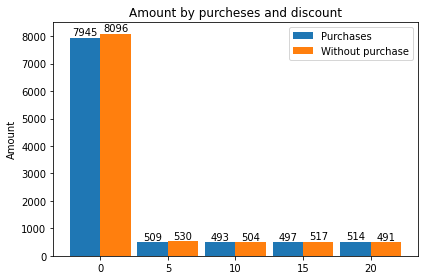

In [73]:
labels = ['0', '5', '10', '15', '20']
purchases = [data[0][0], data[1][0], data[2][0], data[3][0], data[4][0]]
without_purchases = [data[0][1], data[1][1], data[2][1], data[3][1], data[4][1]]

x = np.arange(len(labels))
width = 0.45

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, purchases, width, label='Purchases')
rects2 = ax.bar(x + width/2, without_purchases, width, label='Without purchase')
                
ax.set_ylabel('Amount')
ax.set_title('Amount by purcheses and discount')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
                
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

# Długość sesji a zakup

In [74]:
current_id = 100001
current_duration = 0
purchase = False
data_set = []
for i in range(sessions.shape[0]):
    if(sessions.iloc[i]['session_id'] != current_id):
        temp = [current_id, current_duration, purchase]
        data_set.append(temp)
        current_id = sessions.iloc[i]['session_id']
        current_duration = sessions.iloc[i]['duration']
        purchase = sessions.iloc[i]['purchase']
    else:
        current_duration = sessions.iloc[i]['duration']
        

In [77]:
purchase_sum = 0
without_sum = 0
purchases = 0
without_purchases = 0

for i in range(len(data_set)):
    if(data_set[i][2]):
        purchases += 1
        purchase_sum += data_set[i][1]
    else:
        without_purchases += 1
        without_sum += data_set[i][1]

average_purchase_time = purchase_sum / purchases
average_without_time = without_sum / without_purchases

print(average_purchase_time)
print(average_without_time)

469.1884290879871
327.5334385480371
